In [132]:
import numpy as np

In [133]:
import random
num_points = 20

data_points = {i + 1: (random.uniform(1, 10), random.uniform(1, 10)) for i in range(num_points)}

In [134]:
data_points

{1: (5.778225340543029, 2.055856046671774),
 2: (6.0974280397539005, 2.7774349555991455),
 3: (3.453208190382821, 1.1147778151494192),
 4: (9.932530118793522, 7.542877009041854),
 5: (2.5435973855534253, 9.925911136441469),
 6: (1.6127652350832293, 6.6811845118871265),
 7: (2.679067774584093, 2.805958372612476),
 8: (3.107074033922627, 2.143697315026851),
 9: (2.5129937982147545, 7.667612605250431),
 10: (2.4800070125223153, 9.793706790912811),
 11: (7.760455770858605, 1.1735835558326364),
 12: (7.930117956345165, 1.7706435731496029),
 13: (5.299964803299887, 1.7475302199588474),
 14: (2.0196992472595925, 8.540953881426413),
 15: (4.8123138059112875, 9.221747294021453),
 16: (1.976172555198636, 5.06384422175925),
 17: (9.310437020718027, 2.8488755590927823),
 18: (6.072330287604466, 6.7061974515479),
 19: (7.547126579867028, 3.1492409203560836),
 20: (6.972688443256038, 5.121065210952506)}

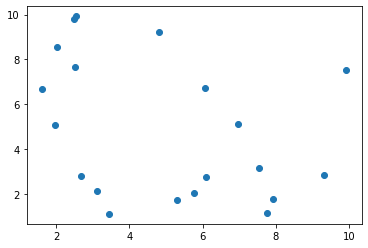

In [135]:
import matplotlib.pyplot as plt

xs = [x for x,_ in data_points.values()]
ys = [y for _,y in data_points.values()]
plt.scatter(xs,ys)

In [136]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((float(x2) - x1)**2 + (y2 - y1)**2)
    return round(distance,2)

def compute_centroid(pts):
    xs = [data_points[p][0] for p in pts]
    ys = [data_points[p][1] for p in pts]
    
    mean_x = float(sum(xs))/len(xs)
    mean_y = float(sum(ys))/len(ys)
    
    return (mean_x, mean_y)

In [137]:
def join(cluster, points):
    for p in points:
        if type(p) == int:
            cluster.append(p)
        else:
            cluster.extend(p)
    return cluster

In [138]:
from heapq import heappush, heappop


def compute_proximity_vals(data):
    n = len(data.keys())
    clusters = list(data.keys())
    pq = []
    for i in range(n):
        for j in range(i+1, n):
            c1, c2 = clusters[i], clusters[j]
            p1 = data[c1]
            p2 = data[c2]
            heappush(pq, (euclidean_distance(p1,p2), [c1,c2]))
    return pq

In [139]:

def get_clusters(data):
    
    prox_vals = compute_proximity_vals(data)
    min_d, pts = heappop(prox_vals)
    joined_cs = [p for p in pts]
    new_cluster = join([], pts)
#     print(prox_vals)
    if len(prox_vals) != 0:
        while min_d == prox_vals[0][0]:
            _, pts = heappop(prox_vals)
            new_cluster = join(new_cluster, pts)
            joined_cs.extend(pts)
    
    # print("joined", joined_cs)
    cluster_center = compute_centroid(new_cluster)
    new_data = {k:v for k,v in data.items() if k not in joined_cs}
    new_data[tuple(new_cluster)] = cluster_center
    
    return new_data

In [140]:
clusters = []
current_clusters = {(k): v for k, v in data_points.items()}
# clusters.append(current_clusters)
# print("clusters:\n", current_clusters)
while len(current_clusters.keys()) != 1:
    current_clusters = get_clusters(current_clusters)
    # print("current_clusters:",list(current_clusters.keys()))
    new_cluster=[]
    for p in current_clusters.keys():
        if type(p) == int:
            new_cluster.append([p])
        else:
            new_cluster.extend([list(p)])
        
    print("current clusters : ", new_cluster)
    clusters.append(new_cluster)

current clusters :  [[1], [2], [3], [4], [6], [7], [8], [9], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [5, 10]]
current clusters :  [[2], [3], [4], [6], [7], [8], [9], [11], [12], [14], [15], [16], [17], [18], [19], [20], [5, 10], [1, 13]]
current clusters :  [[2], [3], [4], [6], [7], [8], [9], [14], [15], [16], [17], [18], [19], [20], [5, 10], [1, 13], [11, 12]]
current clusters :  [[2], [3], [4], [6], [9], [14], [15], [16], [17], [18], [19], [20], [5, 10], [1, 13], [11, 12], [7, 8]]
current clusters :  [[2], [3], [4], [6], [15], [16], [17], [18], [19], [20], [5, 10], [1, 13], [11, 12], [7, 8], [9, 14]]
current clusters :  [[3], [4], [6], [15], [16], [17], [18], [19], [20], [5, 10], [11, 12], [7, 8], [9, 14], [2, 1, 13]]
current clusters :  [[4], [6], [15], [16], [17], [18], [19], [20], [5, 10], [11, 12], [9, 14], [2, 1, 13], [3, 7, 8]]
current clusters :  [[4], [15], [16], [17], [18], [19], [20], [5, 10], [11, 12], [2, 1, 13], [3, 7, 8], [6, 9, 14]]
current clusters